In [4]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
geocode = pd.read_csv("../dados/raw/df_geocode.csv")
geocode.drop(columns=["Unnamed: 0"], inplace=True)

- Verificar o início, fim e amostras aleatorias do dataset.

In [8]:
geocode.head(10)

,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0
5,L158,"3400 ARAMINGO AVE STE 4, PHILADELPHIA, PA 19134\n","39.9924717,-75.1035442",9134.0
6,L172,"1129 HOSPITAL DR STE 5E, STOCKBRIDGE, GA 30281","33.5113314,-84.2316312",30281.0
7,L518,"1763 SANTA RITA ROAD, PLEASANTON, CA 94566","37.6759064,-121.8772172",94566.0
8,L531,"5860 OWENS DR. SUITE 120, PLEASANTON, CA 94588","37.6993,-121.9014055",94588.0
9,L160,"135 BROADWAY, LAWRENCE, MA 01840","42.7065088,-71.171084",1840.0


In [9]:
geocode[-10:].head(10)

,Lab Id,Address,Location,Zipcode
109,L161,"1904 GENESEE ST, UTICA, NY 13502","43.0879409,-75.2624454",13502.0
110,L075,"2300 S BROAD ST STE 102, PHILADELPHIA, PA 19145","39.9218172,-75.1730023",19145.0
111,L668,"975 JOHNSON FERRY RD NE 320, ATLANTA, GA 30342","33.9073497,-84.3581189",30342.0
112,L140,"11800 NE 128TH ST 130, KIRKLAND, WA 98034","47.7148568,-122.1866063",98034.0
113,L071,"9633 LEVIN RD NW 202, SILVERDALE, WA 98383","47.6516517,-122.687053",98383.0
114,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002","39.9184081,-75.035649",8002.0
115,L535,"603 SENECA ST 4, ONEIDA, NY 13421","43.0773695,-75.6536905",13421.0
116,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304","43.2530101,-75.1860015",13304.0
117,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806","41.5611182,-90.5915183",52806.0
118,L967,"2700 GRANT ST. SUITE 107, CONCORD, CA 94520","37.984716,-122.0383645",94520.0


In [10]:
geocode.sample(10)

,Lab Id,Address,Location,Zipcode
49,L126,"5349 OXFORD AVE UNIT B, PHILADELPHIA, PA 19124","40.0294758,-75.0869837",19124.0
14,L153,"790 CHURCH ST NE SUITE 505, MARIETTA, GA 30060","33.9710116,-84.5511075",30060.0
75,L660,"49 RANGE RD STE 101, WINDHAM, NH 03087","42.8075256,-71.2622671",3087.0
46,L155,"2400 Balfour Rd #100, Brentwood, CA 94513","37.9242863,-121.7371186",94513.0
83,-2,Unavailable,Unavailable,NaN
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
60,L523,"245 N BROAD ST GROUND FLOOR, PHILADELPHIA, PA ...","39.957358,-75.1642512",9107.0
106,L064,"1288 WELLBROOK CIR NE SUITE C, CONYERS, GA 30012","33.677914,-84.00695",30012.0
17,L070,"150 N. MCDADE BLVD., GLENOLDEN, PA 19036","39.9076973,-75.289741",19036.0
22,L534,"550 PEACHTREE ST NE 1460, ATLANTA, GA 30308","33.7681453,-84.388286",30308.0


- Verificar erros de tipo

In [11]:
geocode.dtypes

Lab Id       object
Address      object
Location     object
Zipcode     float64
dtype: object

- Analisar taxa de entradas nulas.

In [12]:
geocode.isna().sum()/geocode.count()

Lab Id      0.000000
Address     0.000000
Location    0.000000
Zipcode     0.008475
dtype: float64

- Analisar número de tokens, em caso de texto.

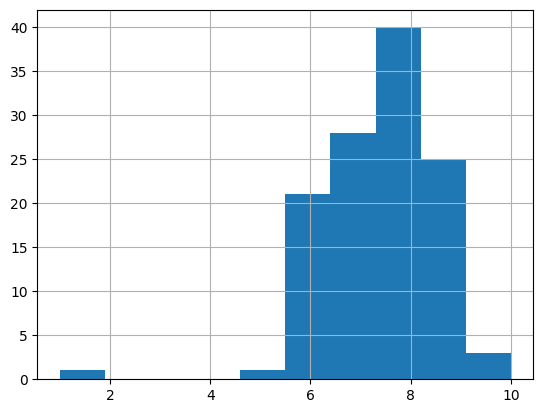

In [18]:
# Verificando distribuição dos tokens
# Verificando o numero de tokens em cada endereco
geocode["num_tokens"]=geocode["Address"].str.split().str.len()
geocode["num_tokens"].hist()
plt.show()

- Procurar por duplicatas.

In [13]:
print("ID de laboratporios duplicados: ",geocode.duplicated(["Lab Id"]).sum())

ID de laboratporios duplicados:  0


### Verificando se todos os pontos estão nos Estados Unidos

In [14]:
geocode[["lat","long"]] = geocode["Location"].str.split(",", expand=True)

In [17]:
px.scatter_geo(geocode, lat="lat", lon="long")

### Observações em relação ao GeoCode

- O zip-code deveria estar no formato de string ao invés de float.
- O zip-code na etapa na descrição do endereço e bate com o da coluna
- Alguns com ids inválidos
- Um endereço possui só um token, extaamante aquele que possui id inválido.